In [2]:
import pandas as pd 
import numpy as np


### Part A: Conceptual Questions

#### 1. What is a Decision Tree and how it makes decisions

- A Decision Tree is a model that makes decisions using a tree-like structure
- It splits data based on conditions and moves step-by-step to reach a result
- It works like answering questions from top (root) to bottom (leaf)
- Example: “Is BP > 140?”  Yes/No , next question , final prediction

#### 2. What is a split criterion

- Split criterion is the rule the tree uses to divide data at each node
- It helps the tree choose the best feature to split
- The goal is to reduce impurity (errors) after the split
- Common criteria are Gini and Entropy

#### 3. Difference between Gini Impurity and Entropy

- Gini checks how often a class might be misclassified
- Entropy measures disorder or uncertainty in data
- Gini is faster to compute, Entropy uses logarithmic math
- Both help find the best split, but approach is different

#### 4. Why Decision Trees overfit

- Trees keep splitting until training data is classified perfectly
- This makes the model learn noise along with real patterns
- No control on depth or leaf size increases overfitting risk
- Example: making rules for 1–2 patients instead of general cases

#### 5. Role of max_depth

- max_depth limits how deep the tree can grow
- Small depth = simple tree (may miss patterns)
- Large depth = complex tree (may learn noise)
- It helps balance learning and reduce overfitting


#### Part B: Data Exploration


In [3]:
# Load the dataset and display
data=pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
#Shape of the dataset

data.shape

(1025, 14)

In [35]:
# Column names

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(723)

#### Part C: Data Preprocessing

In [37]:
#Feature columns(x)
x=data.drop("target", axis=1)
# Target column(y)
y=data["target"]

In [11]:
from sklearn.model_selection import train_test_split

In [38]:
# Split the dataset:
# Training set – 80%
# Testing set – 20%
# Use random_state=42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2 , shuffle=True,random_state=42)

In [13]:
print('Shape of Training Feature DataSet =',x_train.shape)
print('Shape of Training Target DataSet =',y_train.shape)

print('Shape of testing Feature DataSet =',x_test.shape)
print('Shape of Testing Target DataSet =',y_test.shape)

Shape of Training Feature DataSet = (820, 13)
Shape of Training Target DataSet = (820,)
Shape of testing Feature DataSet = (205, 13)
Shape of Testing Target DataSet = (205,)


#### Part D: Model Building

In [14]:
from sklearn.tree import DecisionTreeClassifier

##### Create a Decision Tree Classifier with:
##### criterion='gini'
##### random_state=42

In [15]:
model=DecisionTreeClassifier(criterion='gini',random_state=42)

In [39]:
# Train the model on training data.
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Predict on the test data.
y_predict=model.predict(x_test)

#### Part E: Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Accuracy score  for train data

accuracy_score(y_train, model.predict(x_train))

1.0

In [43]:
# Accuracy score  for test data
accuracy_score(y_test, y_predict)

0.9853658536585366

In [42]:
# Confusion matrix
cm= confusion_matrix(y_test, y_predict)
print(cm)

[[102   0]
 [  3 100]]


In [22]:
from sklearn.metrics import classification_report

In [44]:
# Classification repor
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



#### Which class is predicted better?
- Class 0 (No disease) is predicted slightly better because its recall = 1.00 (100%), so the model caught all healthy cases.

- Class 1 (Disease) is also predicted very well (F1 = 0.99) but recall = 0.97, meaning a few disease cases were not detected.

- Both classes have very high precision and F1, so errors are very low overall.

- Training and testing accuracy are both 99% with almost no difference, so the tree learned real patterns, not noise.

#### Is the model overfitting or underfitting?

- The model is well-fit (neither overfitting nor underfitting) and works reliably for this dataset.

#### Part F: Understanding Tree Depth (Manual Experiment)

In [24]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
model1.fit(x_train, y_train)
train_predict1=model1.predict(x_train)
test_predict1=model1.predict(x_test)

In [25]:
print("Model1 - max_depth=2  | Train Acc:", accuracy_score(y_train, train_predict1),
      "| Test Acc:", accuracy_score(y_test, test_predict1))

Model1 - max_depth=2  | Train Acc: 0.7695121951219512 | Test Acc: 0.6780487804878049


In [26]:
model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model2.fit(x_train, y_train)
train_predict2=model2.predict(x_train)
test_predict2=model2.predict(x_test)


In [27]:
print("Model2 - max_depth=5  | Train Acc:", accuracy_score(y_train, train_predict2),
      "| Test Acc:", accuracy_score(y_test, test_predict2))

Model2 - max_depth=5  | Train Acc: 0.9292682926829269 | Test Acc: 0.8439024390243902


In [28]:
model3 = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model3.fit(x_train, y_train)
train_predict3=model3.predict(x_train)
test_predict3=model3.predict(x_test)

In [29]:
print("Model3 - max_depth=None  | Train Acc:", accuracy_score(y_train, train_predict3),
      "| Test Acc:", accuracy_score(y_test, test_predict3))

Model3 - max_depth=None  | Train Acc: 1.0 | Test Acc: 0.9853658536585366


##### 1. What happens when the tree is very shallow?(depth = 2)
- It makes only 1–2 decisions, so it learns very little.
- Example: It may check only cholesterol or BP and ignore other signals.
- This causes many wrong predictions because heart disease depends on multiple factors.
- Result: low accuracy ==> model is underfitting.

##### 2. What happens when the tree is very deep? (depth = None)
- It keeps splitting until every training row is classified perfectly.
- Example: It may build a rule for just 1 patient like age 63 + BP 145 + sugar 1 ==> disease.
- These rules are too specific and may include noise, not real patterns.
- Result: train 100% and test slightly lower ==> mild overfitting.

##### 3. Which model performs best and why?
- Model 3 performs best because it learned many decision rules and captured real patterns.
- Even though it overfit slightly, it still predicts unseen patients correctly most of the time.
- Depth 5 would be best only if test accuracy was highest, but here it’s lower than Model 3.
- So deepest tree wins because it generalizes best for this dataset.

#### Part G: Tree Visualization

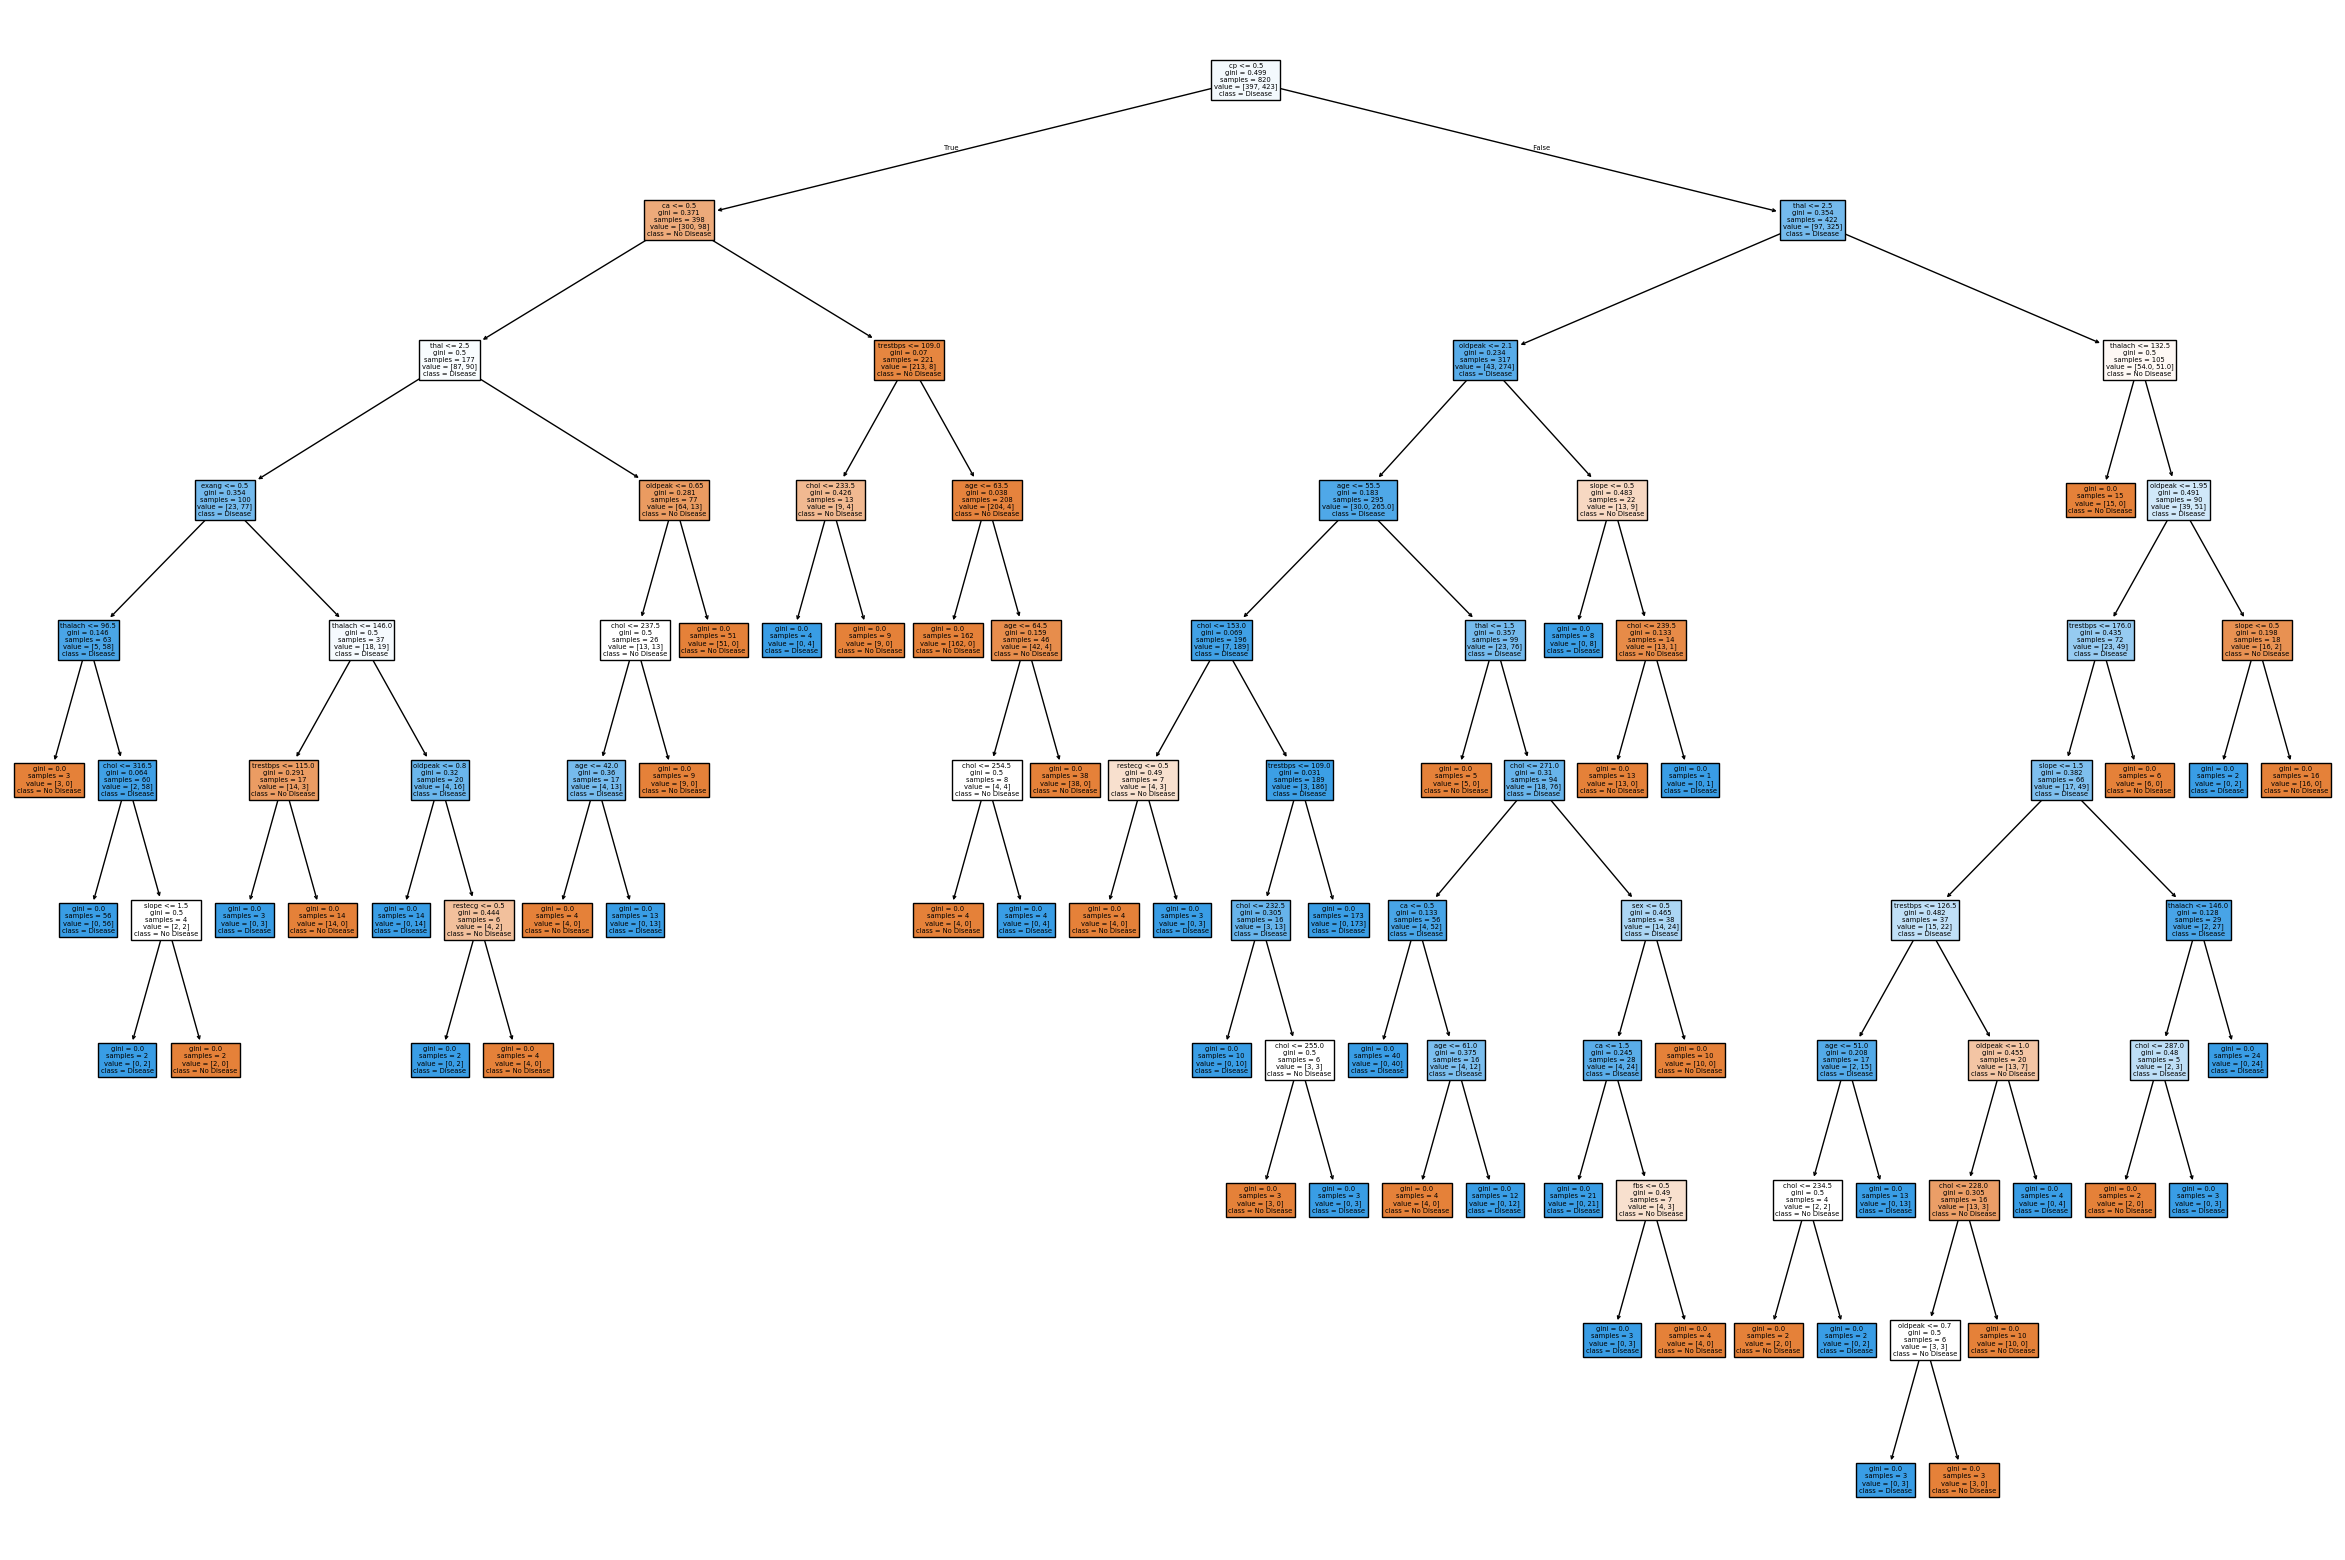

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
tree.plot_tree(model3, feature_names=x.columns, class_names=["No Disease", "Disease"],filled=True)
plt.show()

#### Part H: Reflection Questions

#### 1. why decision trees suits medical data 
- It can use both numeric fata and label data 
- Picks key symptoms by spliting data nto groups
- Works even if the disease pattern is complicated
- Runs fast and doesn't need heavy processing
- Shows clear reasons for predictions, which is good for medical use.

#### 2. why decision trees are easy to interpret
- Rules look like human decisions, like doctor Questions
- you can follow the path from top to bottom
- can draw the tree to see decisions visually
- No complex equations for basic predictions
- Example rule: “Heart rate < 120 and Sugar = 1 -- more chance of disease”

#### 3. Why used in ensemble mothods ( multi - tree)
- One tree alone can give different results if data changes
- Many trees together reduce mistakes
- Random Forest combines trees to give stable answers
- Boosting improves step by step by fixing errors
- Multi-tree models are safer and more accurate than one tree

#### Finally Check with these below parameter

In [45]:
#  Compare criterion='gini' vs criterion='entropy'

In [31]:
# Gini model
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_model.fit(x_train, y_train)
gini_pred = gini_model.predict(x_test)
print("Gini Test Accuracy:", accuracy_score(y_test, gini_pred))

Gini Test Accuracy: 0.9853658536585366


In [32]:
# Entropy model
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_model.fit(x_train, y_train)
entropy_pred = entropy_model.predict(x_test)
print("Entropy Test Accuracy:", accuracy_score(y_test, entropy_pred))

Entropy Test Accuracy: 0.9853658536585366


In [46]:
# Try min_samples_leaf manually

In [33]:
leaf2 = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, random_state=42)
leaf2.fit(x_train, y_train)
print("Leaf 2 Test Acc:", accuracy_score(y_test, leaf2.predict(x_test)))

leaf5 = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, random_state=42)
leaf5.fit(x_train, y_train)
print("Leaf 5 Test Acc:", accuracy_score(y_test, leaf5.predict(x_test)))


Leaf 2 Test Acc: 0.975609756097561
Leaf 5 Test Acc: 0.8975609756097561


#### Conclusion

- The Decision Tree model performed very well for heart disease prediction.
- The deep tree model (max_depth=None) gave the best test accuracy (~98.5%), showing it learned most patterns correctly.
- The shallow tree underperformed, which means limited depth can miss important medical signals.
- Tuning parameters like criterion and min_samples_leaf helps make the model more stable and reduces noise learning.
- Decision Trees are fast, easy to understand, and useful for medical classification problems like this.